In [1]:
import platform
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import *
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_theme(style="ticks", palette="pastel")
if platform.system() == 'Windows':
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
else:  # Mac or other systems
    plt.rcParams['font.family'] = ['Arial Unicode MS']

# preprocess and load data
filepath = 'train_data.pkl'
if not os.path.exists(filepath):
    general_process(output_filepath=filepath)
with open(filepath, 'rb') as fin:
    df = pickle.load(fin)

C:\Users\1\AppData\Local\Temp\ipykernel_9576\3519548733.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\1\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['flux_density_max'] = df['flux_density'].apply(lambda r: np.max(r))

In [3]:
df

,type_material,temp,freq,core_loss,type_waveform,flux_density,flux_density_max
0,1,25,50030,1997.955250,正弦波,"[0.000212759, 0.000389496, 0.00056608, 0.00074...",0.028849
1,1,25,50020,2427.749830,正弦波,"[-0.000550883, -0.000357918, -0.000165251, 2.7...",0.031419
2,1,25,50020,3332.725760,正弦波,"[-0.003779509, -0.003563773, -0.003348945, -0....",0.035535
3,1,25,50020,4502.908007,正弦波,"[-0.000510932, -0.000266662, -2.25e-05, 0.0002...",0.040015
4,1,25,50030,6063.023248,正弦波,"[0.000457688, 0.000732427, 0.00100655, 0.00128...",0.045028
...,...,...,...,...,...,...,...
12395,4,90,199190,20604.900210,梯形波,"[-0.017758287, -0.017339198, -0.016932051, -0....",0.034867
12396,4,90,199190,26504.284280,梯形波,"[-0.019690471, -0.019226928, -0.018775593, -0....",0.038341
12397,4,90,199190,46232.491530,梯形波,"[-0.024998103, -0.024410702, -0.02383819, -0.0...",0.048877
12398,4,90,199190,61458.085900,梯形波,"[-0.027987528, -0.027328599, -0.026686789, -0....",0.054889


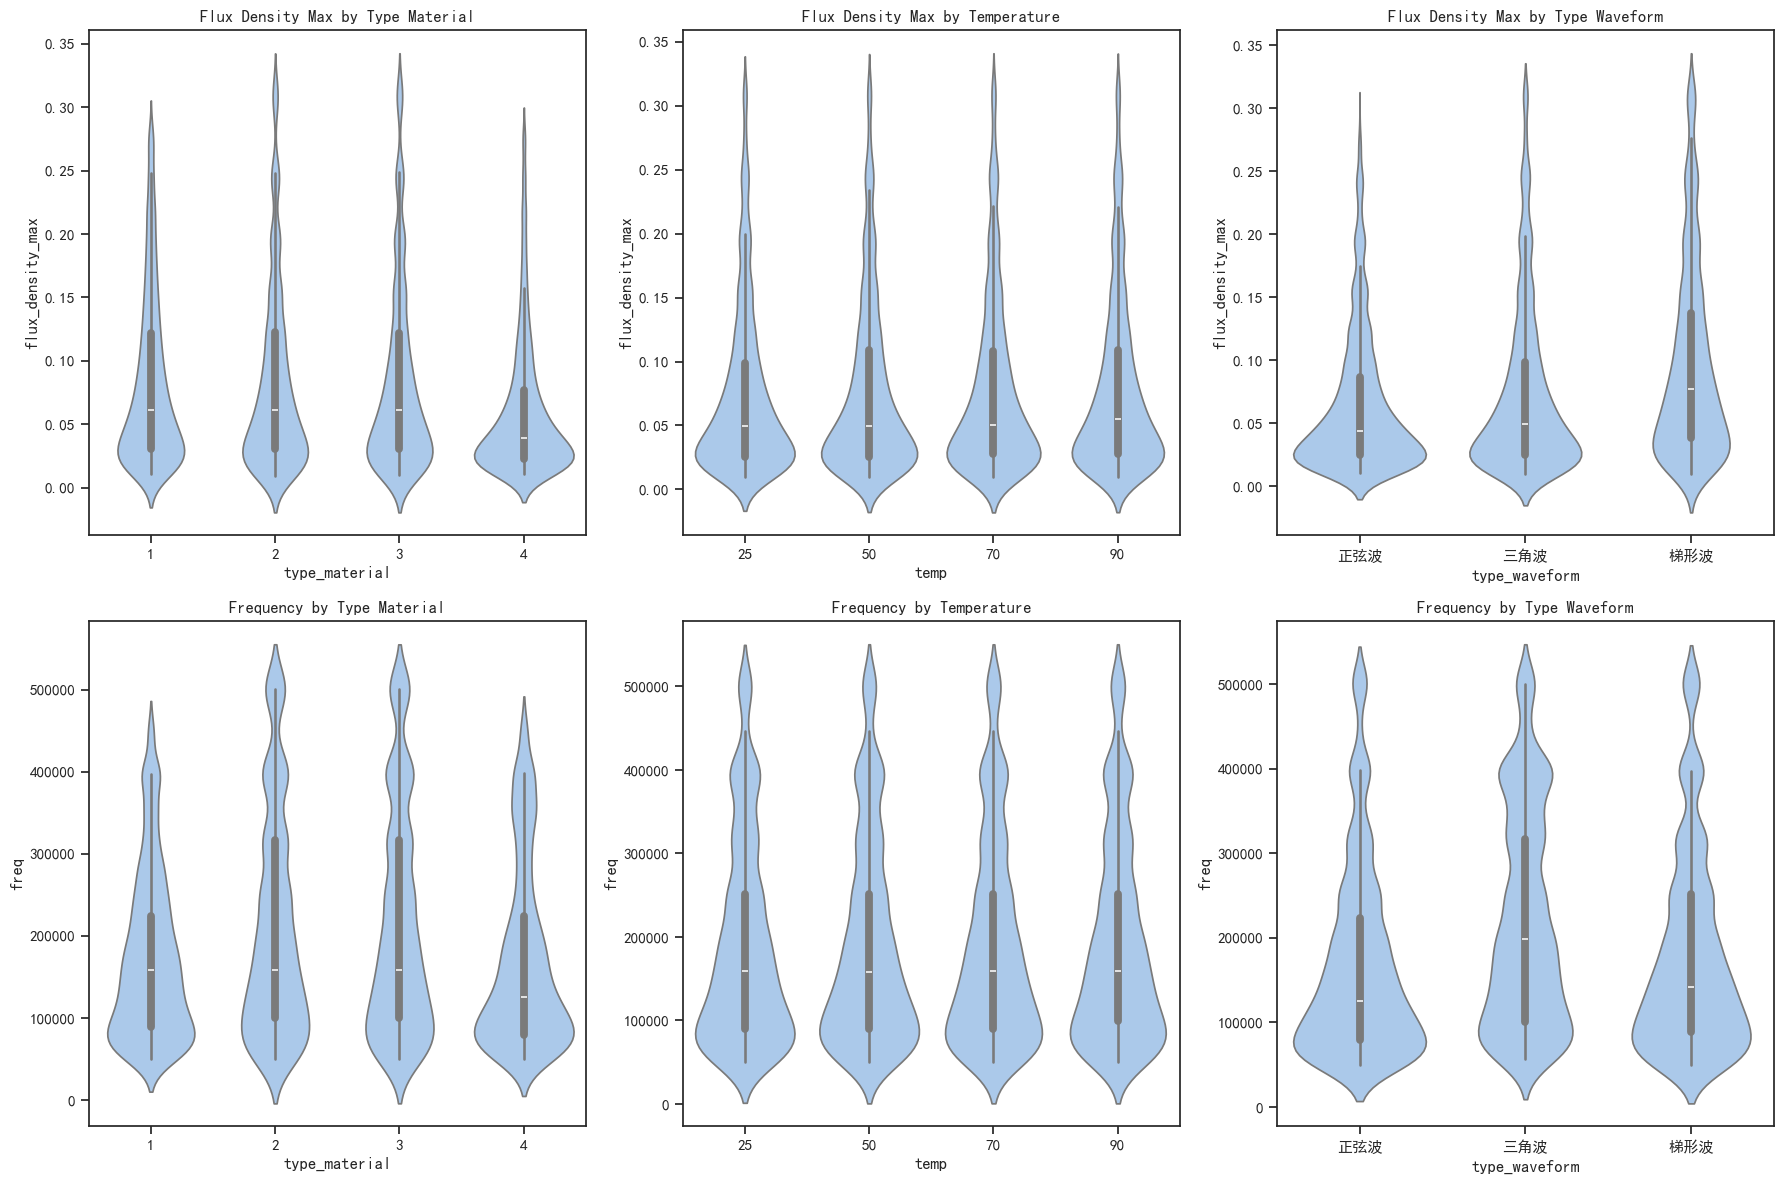

1.单因素方差分析

温度

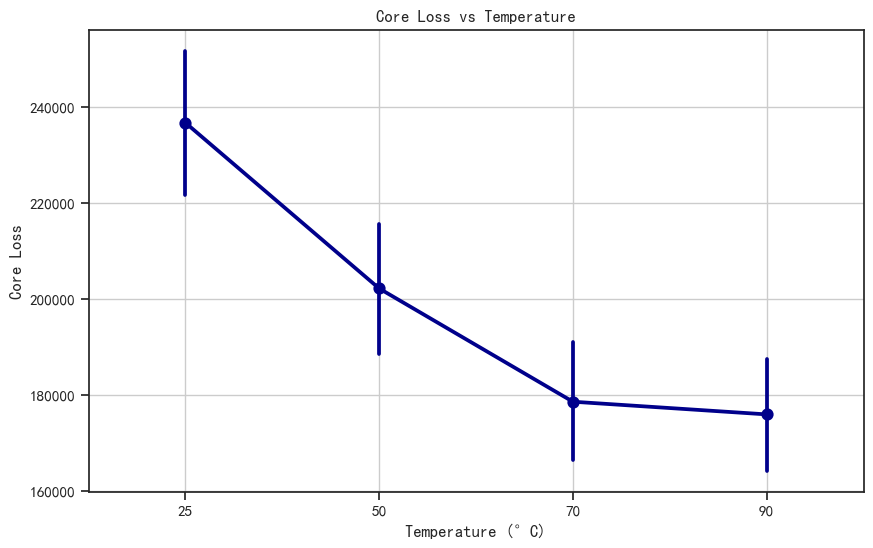

In [58]:
import seaborn as  sns
plt.figure(figsize=(10, 6))
sns.pointplot(x='temp', y='core_loss', data=df, markers='o', linestyles='-', color='darkblue')
plt.title('Core Loss vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Core Loss')
plt.grid(True)
plt.show()

In [6]:
#拟合公式
from statsmodels.formula.api import ols
model1=ols('core_loss~temp',data=df).fit()
#model1.summary() 二选一
#标准输出
from statsmodels.stats.anova import anova_lm
anova_lm(model1)



,df,sum_sq,mean_sq,F,PR(>F)
temp,1.0,6.917689e+12,6.917689e+12,49.034601,2.644635e-12
Residual,12398.0,1.749082e+15,1.410777e+11,NaN,NaN


#F 值表示 temp 对因变量影响的强度。较大的 F 值（49.03）表示 temp 对 core_loss 有显著的影响。
#p 值非常小，约等于 0，这表明 temp 对 core_loss 的影响在统计上是显著的（远小于常用显著性水平 0.05）。因此可以认为温度确实对 core_loss 产生了显著影响。

波形

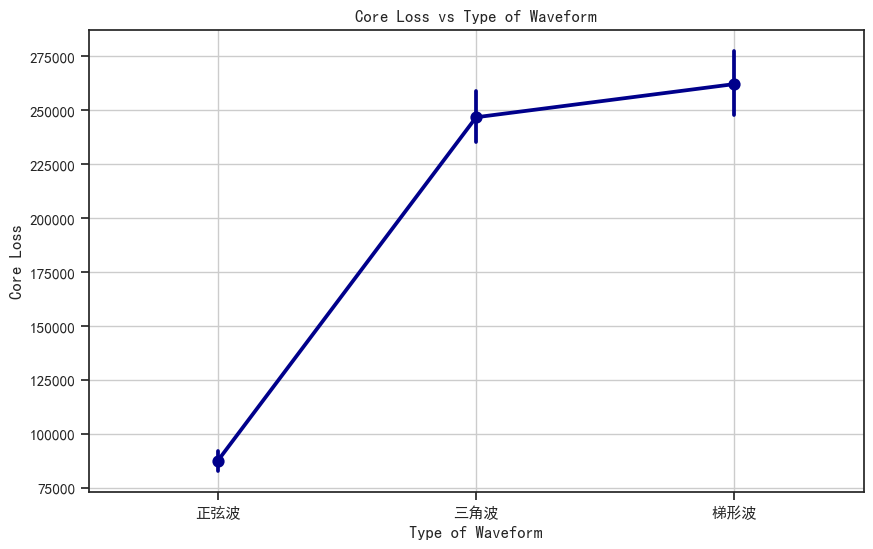

In [53]:


plt.figure(figsize=(10, 6))
sns.pointplot(x='type_waveform', y='core_loss', data=df, markers='o', linestyles='-', color='darkblue')
plt.title('Core Loss vs Type of Waveform')
plt.xlabel('Type of Waveform')
plt.ylabel('Core Loss')
plt.grid(True)
plt.show()


In [8]:
#拟合公式
model2=ols('core_loss~type_waveform',data=df).fit()
#标准输出
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
type_waveform,2.0,7.520255e+13,3.760128e+13,277.334572,1.485398e-118
Residual,12397.0,1.680797e+15,1.355809e+11,NaN,NaN


#F 值表示 type_waveform 对因变量的影响强度。F 值为 277.33，说明 type_waveform 对因变量有非常显著的影响。P值非常小，远小于常用的显著性水平（如 0.05），说明波形类型对因变量的影响在统计上是极显著的。

材料



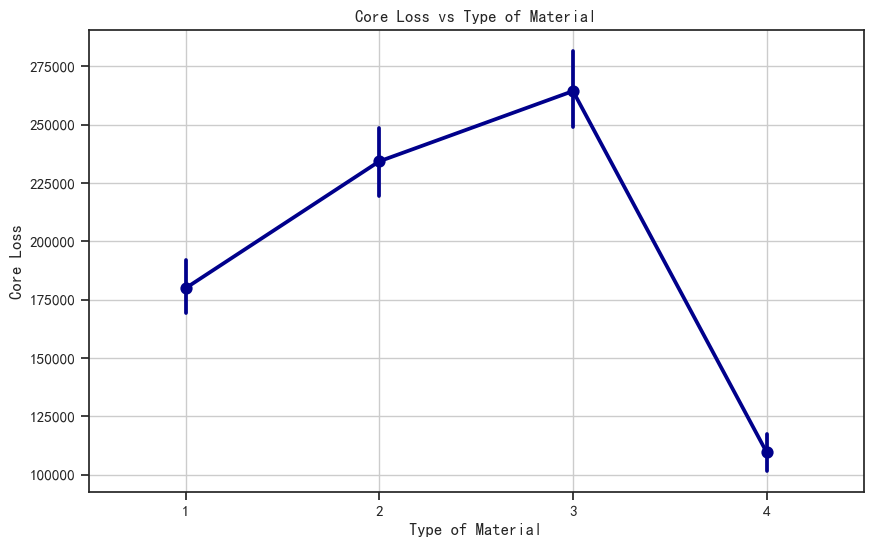

In [55]:

plt.figure(figsize=(10, 6))
sns.pointplot(x='type_material', y='core_loss', data=df, markers='o', linestyles='-', color='darkblue')
plt.title('Core Loss vs Type of Material')
plt.xlabel('Type of Material')
plt.ylabel('Core Loss')
plt.grid(True)
plt.show()

In [10]:
#拟合公式
model3=ols('core_loss~type_material  ',data=df).fit()
#标准输出
anova_lm(model3)
    

,df,sum_sq,mean_sq,F,PR(>F)
type_material,3.0,4.113720e+13,1.371240e+13,99.121035,2.116712e-63
Residual,12396.0,1.714862e+15,1.383399e+11,NaN,NaN


双因素方差分析

温度和材料

In [11]:
model4 = ols('core_loss ~ temp + type_material + temp:type_material', data=df).fit()
anova_results = anova_lm(model4)
print(anova_results)

                         df        sum_sq       mean_sq          F  \
type_material           3.0  4.113720e+13  1.371240e+13  99.504607   
temp                    1.0  6.582415e+12  6.582415e+12  47.765575   
temp:type_material      3.0  5.792869e+11  1.930956e+11   1.401207   
Residual            12392.0  1.707700e+15  1.378067e+11        NaN   

                          PR(>F)  
type_material       1.209784e-63  
temp                5.038799e-12  
temp:type_material  2.403540e-01  
Residual                     NaN  


温度和波形

在最小二乘法拟合中，我们的目标是找到一组回归系数，使得预测值与实际观测值之间的误差平方和最小化。对于模型，最小二乘法的数学公式可以表示为：
假设因变量为Y即 core_loss），自变量为X1（即 temp），X2(即 type_waveform）,以及它们的交互作用项X1

In [12]:
#最小二乘法拟合
model5 = ols('core_loss ~ temp + type_waveform + temp:type_waveform', data=df).fit()
anova_results = anova_lm(model5)
print(anova_results)

                         df        sum_sq       mean_sq           F  \
type_waveform           2.0  7.520255e+13  3.760128e+13  278.962217   
temp                    1.0  8.355020e+12  8.355020e+12   61.985526   
temp:type_waveform      2.0  1.856195e+12  9.280973e+11    6.885513   
Residual            12394.0  1.670585e+15  1.347899e+11         NaN   

                           PR(>F)  
type_waveform       3.132895e-119  
temp                 3.747030e-15  
temp:type_waveform   1.026407e-03  
Residual                      NaN  


In [13]:
predictions1 = model5.predict(df)
print(predictions1) 



0        106500.691472
1        106500.691472
2        106500.691472
3        106500.691472
4        106500.691472
             ...      
12395    205923.672793
12396    205923.672793
12397    205923.672793
12398    205923.672793
12399    205923.672793
Length: 12400, dtype: float64


In [26]:
def model_expression(model):
    params = model.params
    terms = model.model.exog_names
    expression = "core_loss = "
    for i, term in enumerate(terms):
        if i == 0:
            expression += f"{params[term]:.4f}"
        else:
            expression += f" + ({params[term]:.4f} * {term})"
    return expression

# 示例使用 model5
print("core_loss ~ temp + type_waveform + temp:type_waveform 的模型表达式:")
print(model_expression(model5))


core_loss ~ temp + type_waveform + temp:type_waveform 的模型表达式:
core_loss = 301356.5999 + (73133.4288 * type_waveform[T.梯形波]) + (-180208.6791 * type_waveform[T.正弦波]) + (-944.0170 * temp) + (-928.9425 * temp:type_waveform[T.梯形波]) + (358.1279 * temp:type_waveform[T.正弦波])


In [36]:
min_loss_index = np.argmin(predictions1)
optimal_conditions1 = df.iloc[min_loss_index]
print("最小磁芯损耗的条件（温度和波形）:")
print(optimal_conditions1[['temp', 'type_waveform', 'core_loss']])

最小磁芯损耗的条件（温度和波形）:
temp                      90
type_waveform            正弦波
core_loss        1062.695125
Name: 792, dtype: object


材料和波形


In [37]:
model6 = ols('core_loss ~ type_material + type_waveform + type_material:type_waveform', data=df).fit()
anova_results = anova_lm(model6)
print(anova_results)

                                  df        sum_sq       mean_sq           F  \
type_material                    3.0  4.113720e+13  1.371240e+13  104.470387   
type_waveform                    2.0  7.697475e+13  3.848737e+13  293.223002   
type_material:type_waveform      6.0  1.188392e+13  1.980653e+12   15.089962   
Residual                     12388.0  1.626003e+15  1.312563e+11         NaN   

                                    PR(>F)  
type_material                 8.634886e-67  
type_waveform                3.777832e-125  
type_material:type_waveform   2.720745e-17  
Residual                               NaN  


In [38]:
def model_expression(model):
    params = model.params
    terms = model.model.exog_names
    expression = "core_loss = "
    for i, term in enumerate(terms):
        if i == 0:
            expression += f"{params[term]:.4f}"
        else:
            expression += f" + ({params[term]:.4f} * {term})"
    return expression

# 示例使用 model6
print("core_loss ~ type_material + type_waveform + type_material:type_waveform 的模型表达式:")
print(model_expression(model6))

core_loss ~ type_material + type_waveform + type_material:type_waveform 的模型表达式:
core_loss = 229194.1519 + (106503.4846 * type_material[T.2]) + (100448.5008 * type_material[T.3]) + (-87899.6258 * type_material[T.4]) + (-34333.6561 * type_waveform[T.梯形波]) + (-127481.9202 * type_waveform[T.正弦波]) + (-10027.5522 * type_material[T.2]:type_waveform[T.梯形波]) + (52336.1167 * type_material[T.3]:type_waveform[T.梯形波]) + (27893.1907 * type_material[T.4]:type_waveform[T.梯形波]) + (-113371.6706 * type_material[T.2]:type_waveform[T.正弦波]) + (-98879.8524 * type_material[T.3]:type_waveform[T.正弦波]) + (29622.8755 * type_material[T.4]:type_waveform[T.正弦波])


In [39]:

predictions2 = model6.predict(df)
print(predictions2) 


0        101712.231731
1        101712.231731
2        101712.231731
3        101712.231731
4        101712.231731
             ...      
12395    134854.060664
12396    134854.060664
12397    134854.060664
12398    134854.060664
12399    134854.060664
Length: 12400, dtype: float64


In [40]:
min_loss_index = np.argmin(predictions2)
optimal_conditions2 = df.iloc[min_loss_index]
print("最小磁芯损耗的条件（材料和波形）:")
print(optimal_conditions2[['type_material', 'type_waveform', 'core_loss']])

最小磁芯损耗的条件（材料和波形）:
type_material              4
type_waveform            正弦波
core_loss        2525.795337
Name: 9600, dtype: object


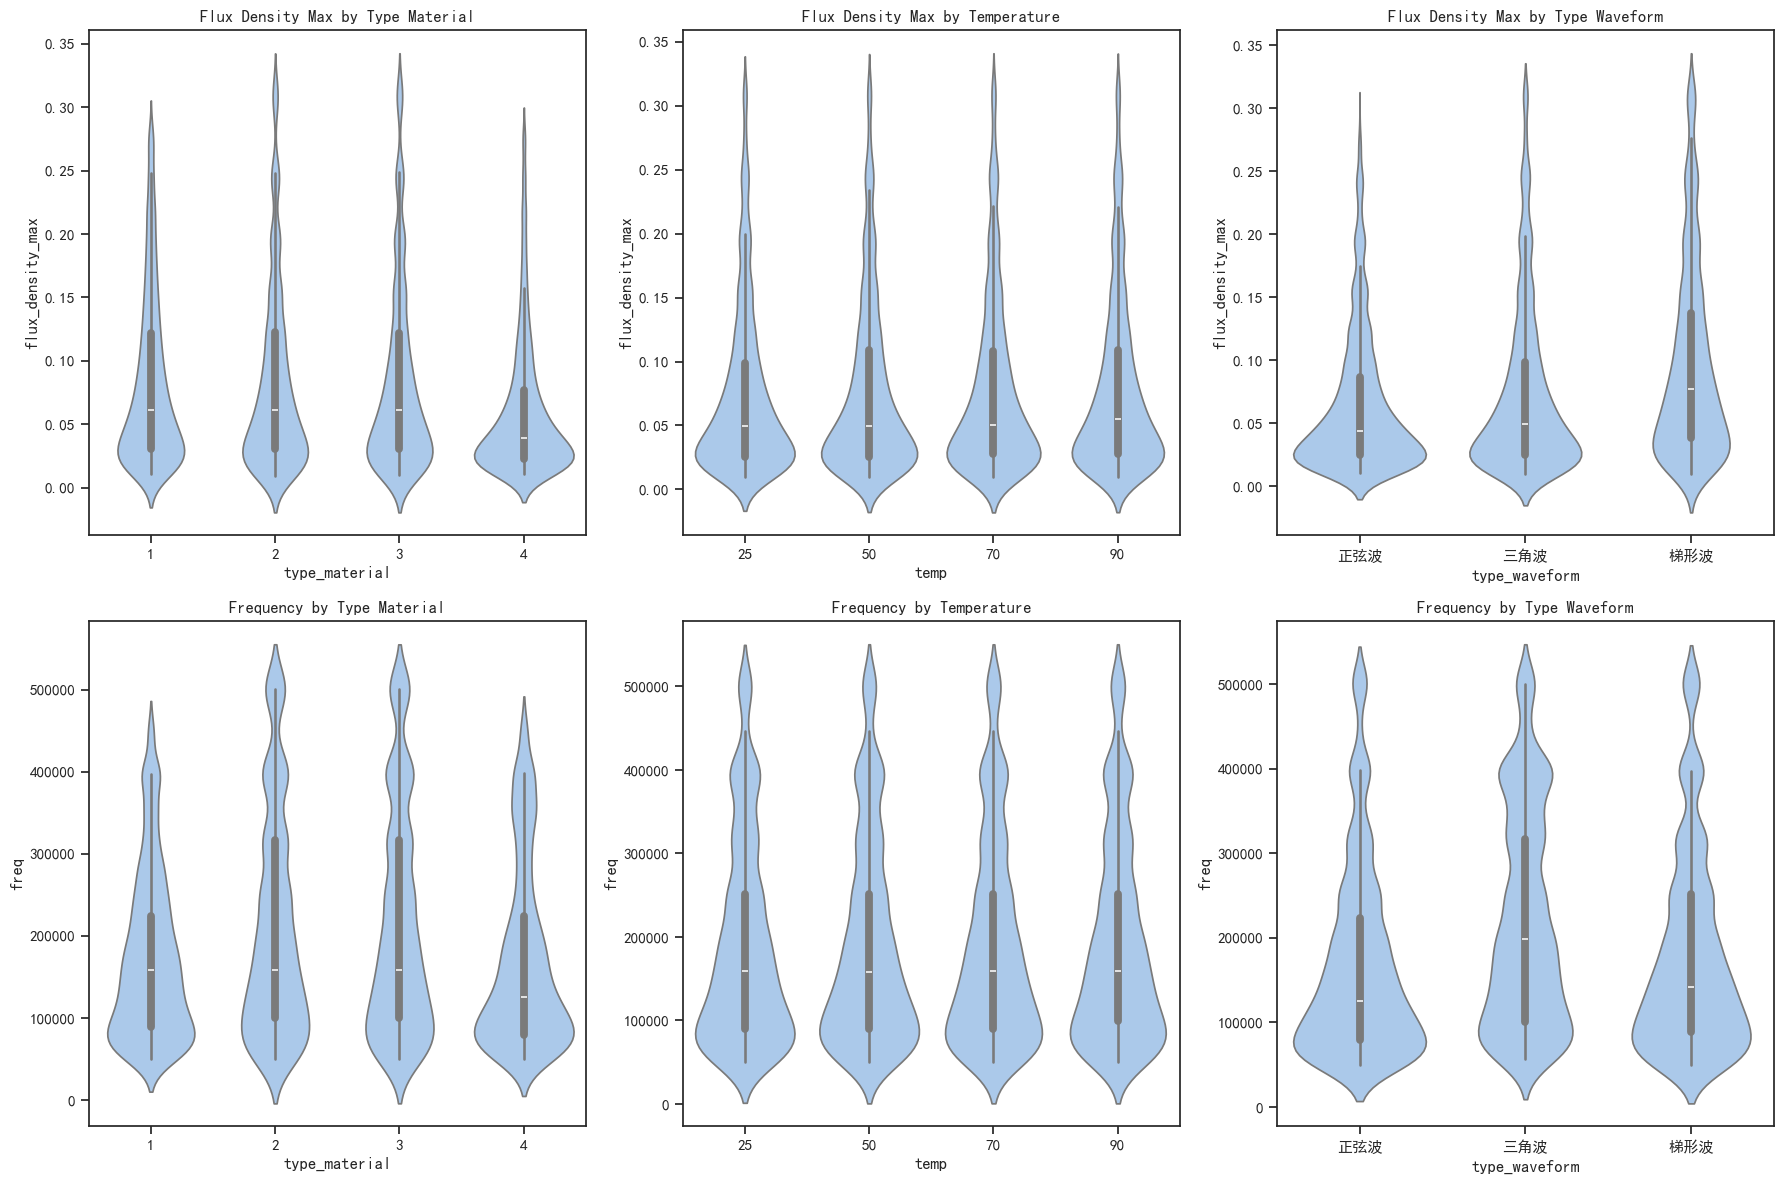

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.violinplot(data=df, x="type_material", y="flux_density_max", ax=axes[0, 0])
axes[0, 0].set_title('Flux Density Max by Type Material')

sns.violinplot(data=df, x="temp", y="flux_density_max", ax=axes[0, 1])
axes[0, 1].set_title('Flux Density Max by Temperature')

sns.violinplot(data=df, x="type_waveform", y="flux_density_max", ax=axes[0, 2])
axes[0, 2].set_title('Flux Density Max by Type Waveform')

sns.violinplot(data=df, x="type_material", y="freq", ax=axes[1, 0])
axes[1, 0].set_title('Frequency by Type Material')

sns.violinplot(data=df, x="temp", y="freq", ax=axes[1, 1])
axes[1, 1].set_title('Frequency by Temperature')

sns.violinplot(data=df, x="type_waveform", y="freq", ax=axes[1, 2])
axes[1, 2].set_title('Frequency by Type Waveform')

plt.tight_layout()
plt.show()

说明温度独立于频率和磁通密度峰值影响